Importações de pacotes e dados

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
dados = pd.read_csv('drive/My Drive/Colab Google/Tarefa DL 1/Pima-Diabetes.csv', header=None)
dados_tarefa = pd.read_csv('drive/My Drive/Colab Google/Tarefa DL 1/Test-Group-2.csv', header=None)

Breve exploração dos dados

In [ ]:
dados.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       758 non-null    int64  
 1   1       758 non-null    int64  
 2   2       758 non-null    int64  
 3   3       758 non-null    int64  
 4   4       758 non-null    int64  
 5   5       758 non-null    float64
 6   6       758 non-null    float64
 7   7       758 non-null    int64  
 8   8       758 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 53.4 KB


In [ ]:
dados.columns = ['Col0','Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8']
dados.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Separando as labels do conjunto de dados
labels = dados['Col8']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Col8, dtype: int64

In [ ]:
dados = dados.drop('Col8', axis=1)

dados.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
print(dados.shape)
print(labels.shape)

(758, 8)
(758,)


Separando os dados de treino dos de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    dados,
    labels,
    test_size=0.799)

print(X_train.shape)
print(X_test.shape)

(152, 8)
(606, 8)


In [ ]:
y_test.value_counts()

0    406
1    200
Name: Col8, dtype: int64

In [ ]:
y_train.value_counts()

0    87
1    65
Name: Col8, dtype: int64

Criação, compilação e análise dos resultados do modelo

In [ ]:
model = Sequential([
  Dense(1000, activation='sigmoid', input_shape=(8,)),
  Dropout(0.3),
  Dense(500, activation='sigmoid'),
  Dropout(0.3),
  Dense(1, activation='sigmoid'),
])

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

historico = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=605,
    validation_data=(X_test, y_test)
)

Epoch 1/20
1/1 [==============================] - 0s 205ms/step - loss: 0.7362 - accuracy: 0.4737 - val_loss: 1.0295 - val_accuracy: 0.6700
Epoch 2/20
1/1 [==============================] - 0s 33ms/step - loss: 1.2832 - accuracy: 0.5724 - val_loss: 0.6426 - val_accuracy: 0.6700
Epoch 3/20
1/1 [==============================] - 0s 33ms/step - loss: 0.7569 - accuracy: 0.5987 - val_loss: 0.9499 - val_accuracy: 0.3300
Epoch 4/20
1/1 [==============================] - 0s 32ms/step - loss: 0.8489 - accuracy: 0.4474 - val_loss: 1.1158 - val_accuracy: 0.3300
Epoch 5/20
1/1 [==============================] - 0s 34ms/step - loss: 0.9354 - accuracy: 0.4342 - val_loss: 0.8197 - val_accuracy: 0.3350
Epoch 6/20
1/1 [==============================] - 0s 33ms/step - loss: 0.7300 - accuracy: 0.5197 - val_loss: 0.6140 - val_accuracy: 0.6617
Epoch 7/20
1/1 [==============================] - 0s 35ms/step - loss: 0.6775 - accuracy: 0.6316 - val_loss: 0.6300 - val_accuracy: 0.6700
Epoch 8/20
1/1 [==========

In [ ]:
historico.history

{'accuracy': [0.4736842215061188,
  0.5723684430122375,
  0.5986841917037964,
  0.44736841320991516,
  0.43421053886413574,
  0.5197368264198303,
  0.6315789222717285,
  0.5921052694320679,
  0.5789473652839661,
  0.5657894611358643,
  0.5986841917037964,
  0.5921052694320679,
  0.5460526347160339,
  0.5789473652839661,
  0.5394737124443054,
  0.6381579041481018,
  0.6315789222717285,
  0.6315789222717285,
  0.6447368264198303,
  0.6447368264198303],
 'loss': [0.7361702919006348,
  1.2831608057022095,
  0.7568638324737549,
  0.8489313721656799,
  0.9353901743888855,
  0.7300164103507996,
  0.6774689555168152,
  0.7666488289833069,
  0.8185677528381348,
  0.7319744229316711,
  0.653667151927948,
  0.6667116284370422,
  0.6830454468727112,
  0.7097480297088623,
  0.6798220276832581,
  0.6227126121520996,
  0.6532619595527649,
  0.636208176612854,
  0.6422695517539978,
  0.5883366465568542],
 'val_accuracy': [0.669966995716095,
  0.669966995716095,
  0.33003300428390503,
  0.3300330042839

Text(0.5, 1.0, 'Acurácia dos dados de treino e validação')

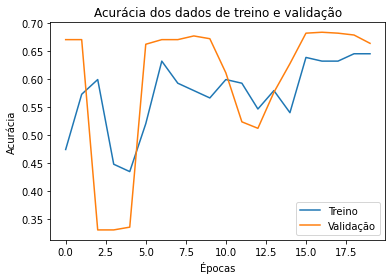

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['Treino', 'Validação'])
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia dos dados de treino e validação')

Text(0.5, 1.0, 'Perda dos dados de treino e validação')

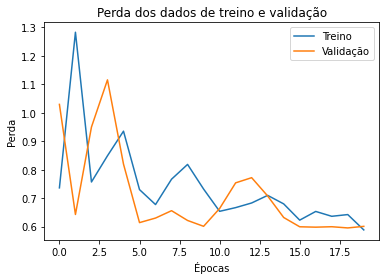

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['Treino', 'Validação'])
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda dos dados de treino e validação')

In [ ]:
predicoes = model.predict(dados_tarefa)
np.argmax(predicoes, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])